/2. Get the data: For this homework, use the iris dataset
Hint: Pandas knows to treat rows with'NA' as missing values

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
iris_data = pd.read_csv("iris-data.csv")

3. Take	a	look	at	the	data	structure:	Write	a	brief	paragraph	about
the		data	set	related	to	each	of	the	following	observations	(submit	
the	code,	the	result,	and	the	paragraphs):	
a. Look	at	the	top	five	rows	of	the	data	set
b. Get	a	quick	description	of	the	data:	Notice	if	there	are	any	
missing	values or	categorical	features
c. Get	a	summary	of	the	numerical	features
d. Plot	the	histogram	of	the	numerical	features

In [41]:
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Missing entries in "petal_width_cm" (145 vs 150). The class column is an object - not a number.

In [43]:
iris_data["class"].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

There seems to be wrongly entered data, multiple renamed errors

In [44]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


My library has an issue with calculating the percentiles if there are missing values. The NaN
values should not be NaN.

4. Discover	and	visualize	the	data	to	gain	insights: (submit	the	
plots,	code,	and	your	observations	of	each	plot)
a. Obtain	scatter	matrix
b. Obtain	the	correlations	among	features	and	comment

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f4b9048>,
      dtype=object)

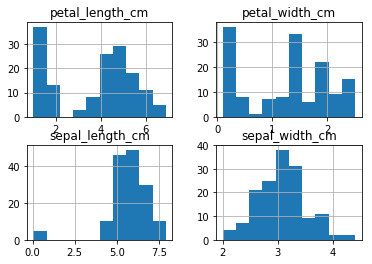

In [45]:
%matplotlib inline
iris_data.hist()

Notice the outliers (the points that are too small or too large compared to the rest).
"sepal_lenth_cm" has some outliers around 0? sepal_length_cm and sepal_width_cm looks like
unimodal (one peak) distributions whereas petal_length_cm and petal_width_cm are bimodal
distributions.

/Users/navya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


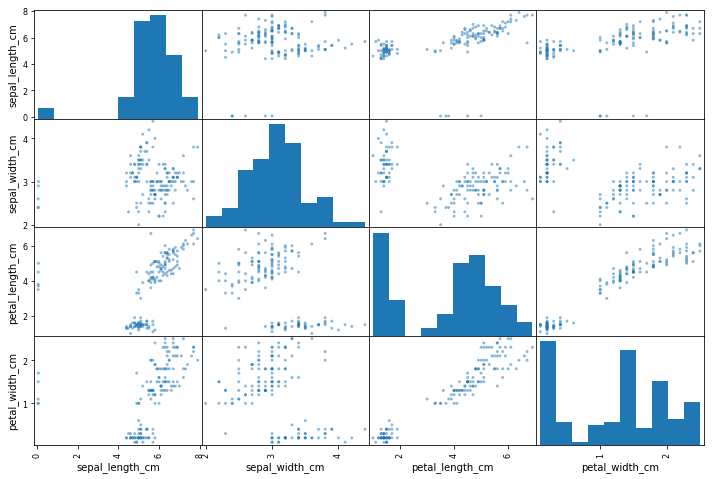

In [46]:
from pandas.tools.plotting import scatter_matrix
attributes = ["sepal_length_cm", "sepal_width_cm", "petal_length_cm", "petal_width_cm"]
scatter_matrix(iris_data[attributes], figsize=(12,8))
plt.show()

In [47]:
corr_matrix = iris_data.corr()
print(corr_matrix)

                 sepal_length_cm  sepal_width_cm  petal_length_cm  \
sepal_length_cm         1.000000        0.066091         0.489083   
sepal_width_cm          0.066091        1.000000        -0.419796   
petal_length_cm         0.489083       -0.419796         1.000000   
petal_width_cm          0.469734       -0.348464         0.958934   

                 petal_width_cm  
sepal_length_cm        0.469734  
sepal_width_cm        -0.348464  
petal_length_cm        0.958934  
petal_width_cm         1.000000  


petal_width_cm and petal_length_cm highly positively correlated (rho = 0.96, also can be observed
in the histogram). sepal_length_cm and petal_length_cm are also positevely correlated
whereas petal_length_cm and sepal_width_cm are negatively correlated. sepal_length_cm and
sepal_width_cm seems to have almost no correlation.

5. Data	Cleaning (submit	the	code,	results	and	plots	showing	the	changes	in	data)

a. Drop	the	data	points	with	NA	in	it.
b. Tidy	up	the	data	by	renaming	the	“class”	data	point	
correctly.	
c. Remove	the	outliers:	drop	the	'Iris-setosa'	rows	with	a	sepal	
width	less	than	2.5	cm.	
d. One	of	the	data	collectors	forgot	to	convert	the	sepal	length	
for	“Iris-versicolor”	to	cm,	instead	added	the	data	as	meters.	
Find	those	and	convert	them	to	cm.
e. Handle	the	categorical	variables	
f. Save	the	clean	data	into	a	new	file.

In [48]:
# 5a.DROP the NA
iris_data_noNA = iris_data.dropna()
iris_data_noNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    145 non-null float64
sepal_width_cm     145 non-null float64
petal_length_cm    145 non-null float64
petal_width_cm     145 non-null float64
class              145 non-null object
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [49]:
iris_data_noNA["class"].value_counts()

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [50]:
# 5b.Tidy Up class names
iris_data_noNA.loc[iris_data_noNA['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data_noNA.loc[iris_data_noNA['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'
iris_data_noNA["class"].value_counts()

/Users/navya/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        45
Name: class, dtype: int64

Now, there are only three classes with the correct naming

In [51]:
# 5c. REMOVE THE OUTLIERS
iris_data_noNA = iris_data_noNA.loc[(iris_data_noNA['class'] != 'Iris-setosa') | \
(iris_data_noNA['sepal_width_cm'] >= 2.5)]

In [52]:
# 5d.Correct the wrongly entered points (unit was in m)
iris_data_noNA.loc[(iris_data_noNA['class'] == 'Iris-versicolor') &
(iris_data_noNA['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


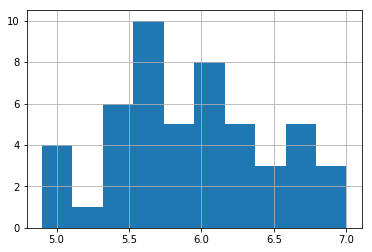

In [53]:
iris_data_noNA.loc[(iris_data_noNA['class'] == 'Iris-versicolor') &
(iris_data_noNA['sepal_length_cm'] < 1.0),
'sepal_length_cm'] *= 100.0
iris_data_noNA.loc[iris_data_noNA['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

In [54]:
iris_data_noNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    144 non-null float64
sepal_width_cm     144 non-null float64
petal_length_cm    144 non-null float64
petal_width_cm     144 non-null float64
class              144 non-null object
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [55]:
# 5e.
iris_data_noNA["class"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        44
Name: class, dtype: int64

/Users/navya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


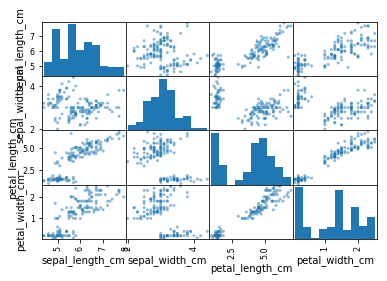

In [56]:
#5f
iris_data_noNA.to_csv('iris-data-clean.csv', index=False)
iris_data_clean = pd.read_csv('iris-data-clean.csv')
scatter_matrix(iris_data_clean[attributes])
plt.show()

6. Utilizing	a	perceptron	learning	algorithm	to	check	if		a	flower	
is	“iris-setosa”	or	not	? (submit	plots,	results,	code	
explainations)
a. Modify	the	clean	dataset	such	that	you	have	class	=+1:	for	
“iris-setosa”,	and	class	=	-1	for	others.	
b. Is	the	new	data	set	linearly	separable?		Will	perceptron	
algorithm	work?	
c. Explain	what	is	the	functionality	of	each	line	of	code	in	the	
perceptron.py	file.
d. Separate	the	data	into	test	and	training	data
e. Use	the	below	perceptron.py		to	train	your	perceptron
f. Does	the	algorithm	converge?	What	is	niter	in	the	code?
g. Obtain	a	plot	of	the	training	accuracy	as	a	function	of	epocs	
(number	of	times	you	go	over	the	entire	training	data)
h. Obtain	the	test	data	accuracy	
i. Sketch	the	decision	boundary	(the	line	that	separates	the	
data;	obtained via	perceptron	algorithm)	and	the	scatter	
plot	of	data	points.	For	“iris-setosa”	use	a	different	identifier		
than	the	rest	of	the	classes.	

As	performance	metric	use accuracy:
accuracy	=	Number	of	data	points	predicted	correctly/Total	number	of	data	points

In [57]:
# perceptron
from perceptron import Perceptron
import numpy as np

In [58]:
y = iris_data_clean.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [59]:
X = iris_data_clean.iloc[:, :4].values
X = X[:, (0,2)]

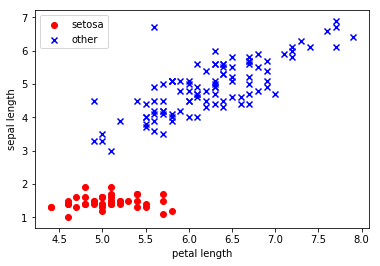

In [60]:
indx1 = np.where(y == -1) ## iris-setosa
indx2 = np.where(y == 1) ## others
plt.scatter(X[indx1, 0], X[indx1, 1], color='red', marker='o', label='setosa')
plt.scatter(X[indx2, 0], X[indx2, 1], color='blue', marker='x', label='other')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

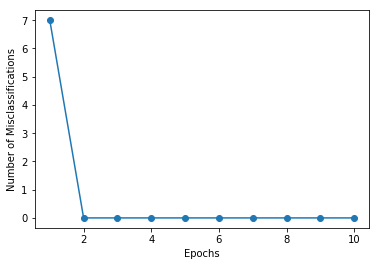

0.0

In [61]:
# you could also do this with sklearn
shuffled_indices = np.random.permutation(len(iris_data_clean))
testsize = int(len(iris_data_clean)*0.2) # 80% training 20% test
test_indices = shuffled_indices[:testsize]
train_indices = shuffled_indices[testsize:]
pn = Perceptron()
pn.fit(X[train_indices,:], y[train_indices])
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Number of Misclassifications")
plt.show()
test_error = sum(abs(pn.predict(X[test_indices,:])-y[test_indices]))/2/len(test_indices)
test_error

In [62]:
#PROVIDED CODE

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

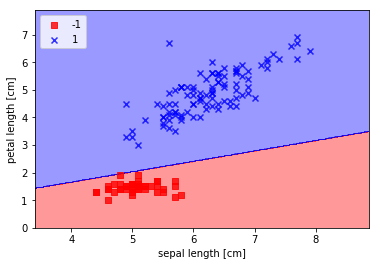

In [63]:
plot_decision_regions(X, y, classifier=pn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()